In [1]:
import numpy as np
%pylab
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: <object object at 0x00000248CFBB2770>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('advertising.csv')

In [5]:
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
pd.isnull(df).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

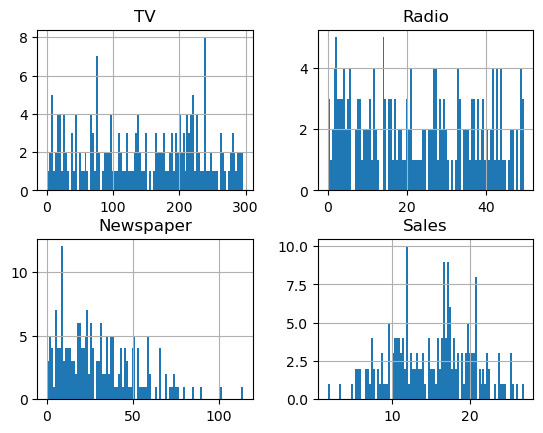

In [16]:
df.hist(bins=100)

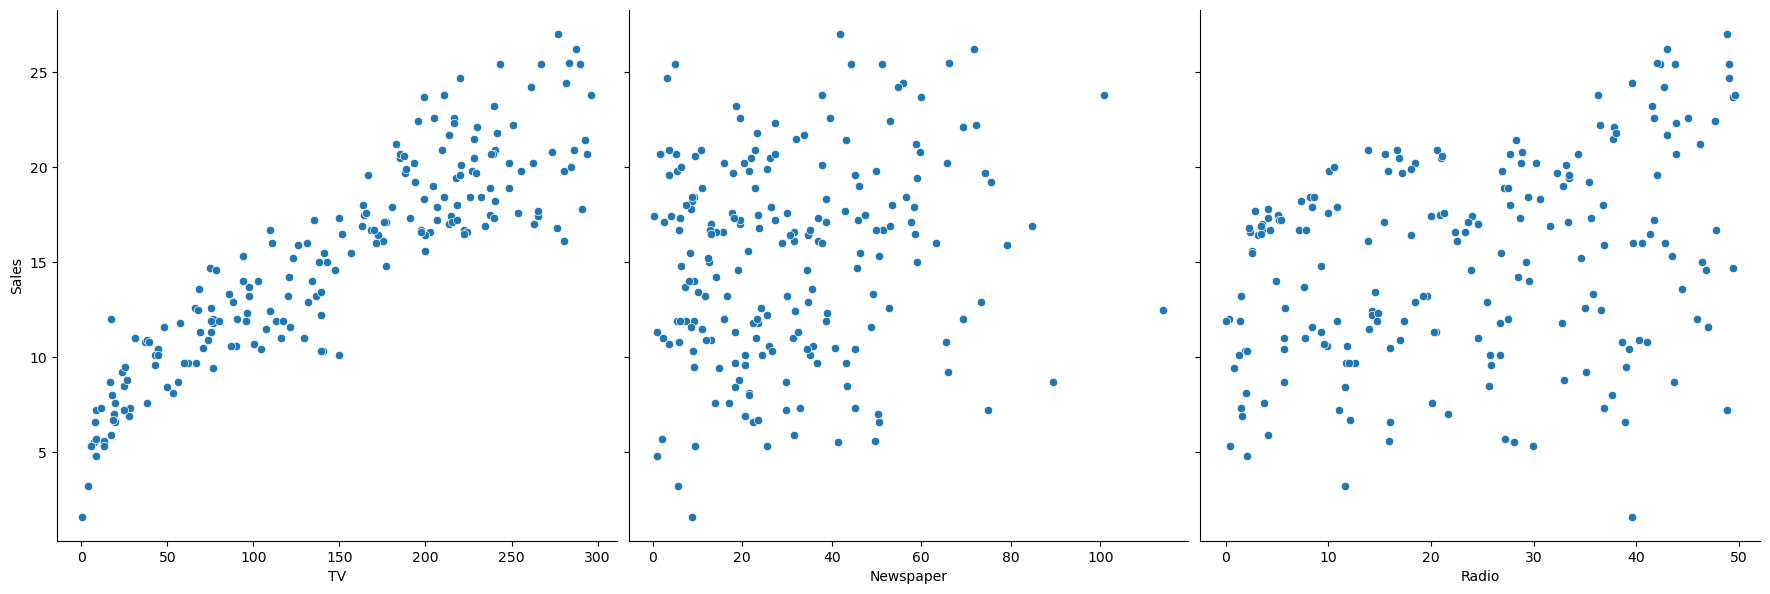

In [18]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=6, aspect=1, kind='scatter')

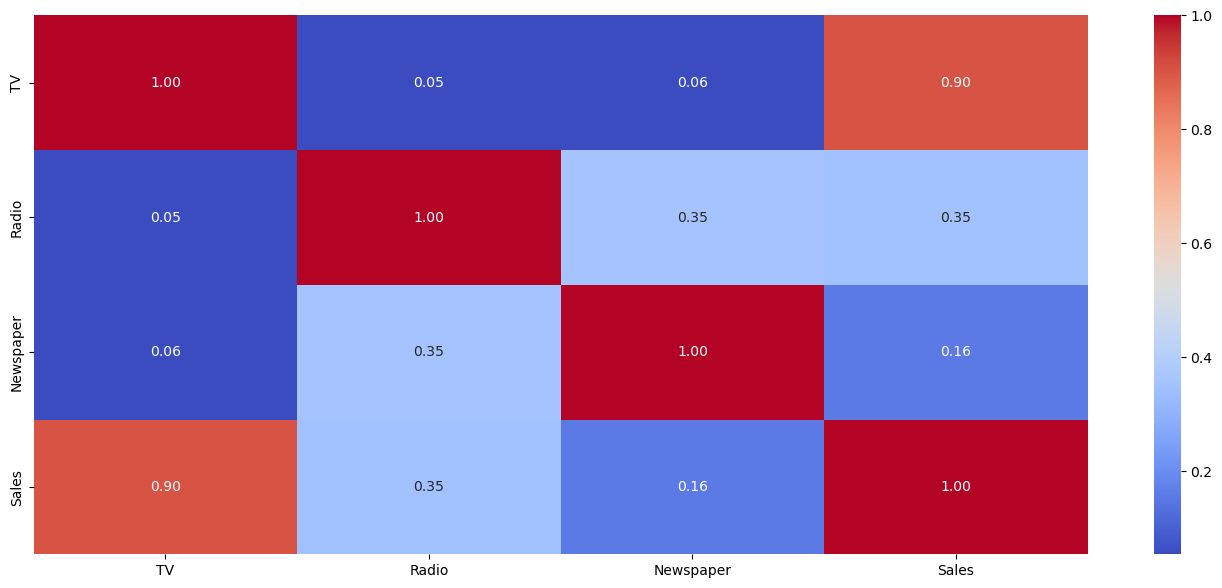

In [20]:
#Correlation
plt.figure(figsize=(17,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot= True, fmt='.2f')
plt.show()

In [21]:
X=df['TV']

In [22]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [25]:
y=df['Sales']

In [26]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [39]:
X_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [40]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

In [41]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model_lm = LinearRegression()

In [44]:
model_lm.fit(X_train, y_train)

LinearRegression()

In [47]:
model_lm.score(X_test, y_test)

0.7281352744078883

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lr = model_lm.predict(X_test)

In [53]:
print('coefficients:', model_lm.coef_)
print('intercept:', model_lm.intercept_)
print('Mean Squared Error:%.2f'
       % mean_squared_error(y_test, y_pred_lr))
print('coefficients of determination(R^2):%.2f'
       % r2_score(y_test, y_pred_lr))

coefficients: [[0.05410548]]
intercept: [6.99553291]
Mean Squared Error:5.35
coefficients of determination(R^2):0.73
